In [29]:
import fastf1
import os
import matplotlib.pyplot as plt

In [2]:
os.makedirs('cache', exist_ok=True)
fastf1.Cache.enable_cache('cache')

In [11]:
sess = fastf1.get_session(2025,"belgian","R")
sess.load()

core           INFO 	Loading data for Belgian Grand Prix - Race [v3.6.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

In [16]:
print(sess.event.Location)
print(sess.drivers)

Spa-Francorchamps
['81', '4', '16', '1', '63', '23', '44', '30', '5', '10', '87', '27', '22', '18', '31', '12', '14', '55', '43', '6']


In [17]:
laps = sess.laps.pick_driver('VER')
print(laps)

                      Time Driver DriverNumber                LapTime  \
132 0 days 02:17:42.391000    VER            1 0 days 00:03:10.061000   
133 0 days 02:20:35.830000    VER            1                    NaT   
134 0 days 02:23:27.398000    VER            1                    NaT   
135 0 days 02:26:26.785000    VER            1                    NaT   
136 0 days 02:28:27.481000    VER            1 0 days 00:02:00.696000   
137 0 days 02:30:27.671000    VER            1 0 days 00:02:00.190000   
138 0 days 02:32:28.213000    VER            1 0 days 00:02:00.542000   
139 0 days 02:34:30.206000    VER            1 0 days 00:02:01.993000   
140 0 days 02:36:33.668000    VER            1 0 days 00:02:03.462000   
141 0 days 02:38:37.646000    VER            1 0 days 00:02:03.978000   
142 0 days 02:40:40.614000    VER            1 0 days 00:02:02.968000   
143 0 days 02:42:46.240000    VER            1 0 days 00:02:05.626000   
144 0 days 02:45:03.239000    VER            1 0 da

d:\F1LP\Data\venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


In [45]:
time = laps['LapTime']
dur_secs = time.dt.total_seconds()
dur_secs = dur_secs[1:]
dur_secs.index = dur_secs.index - 132
dur_secs.index

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43],
      dtype='int64')

In [46]:
def format_mmss(x, pos):
    m, s = divmod(int(x), 60)
    return f"{m}:{s:02d}"

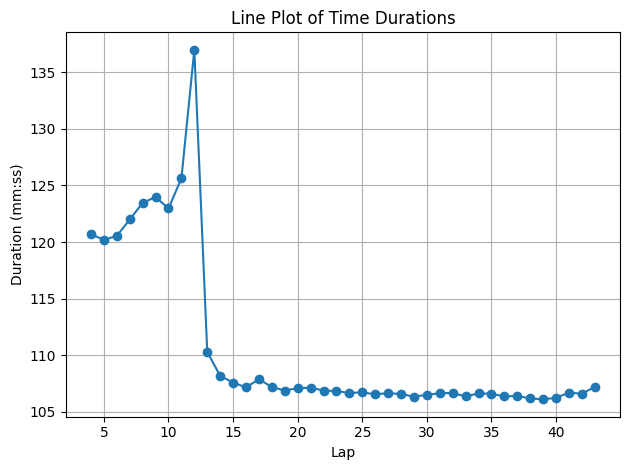

In [49]:
fig, ax = plt.subplots()
ax.plot(dur_secs, marker='o')
ax.set_xlabel("Lap")
ax.set_ylabel("Duration (mm:ss)")
ax.set_title("Line Plot of Time Durations")
plt.grid(True)
plt.tight_layout()
plt.show()

In [55]:
laps = sess.laps.pick_driver('NOR')
r1 = laps.pick_lap(1)
r1

d:\F1LP\Data\venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
d:\F1LP\Data\venv\Lib\site-packages\fastf1\core.py:3137: FutureWarning: pick_lap is deprecated and will be removed in a future release. Use pick_laps instead.
  warnings.warn(("pick_lap is deprecated and will be removed in a "


,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
44,0 days 02:17:37.017000,NOR,4,0 days 00:03:04.619000,1.0,1.0,0 days 02:14:41.752000,NaT,NaT,0 days 00:01:24.158000,...,True,McLaren,0 days 02:14:32.096000,2025-07-27 14:20:00.066,14,1.0,False,,False,False


In [60]:
telemetry = r1.get_car_data().add_distance()
print(telemetry.columns)

Index(['Date', 'RPM', 'Speed', 'nGear', 'Throttle', 'Brake', 'DRS', 'Source',
       'Time', 'SessionTime', 'Distance'],
      dtype='object')


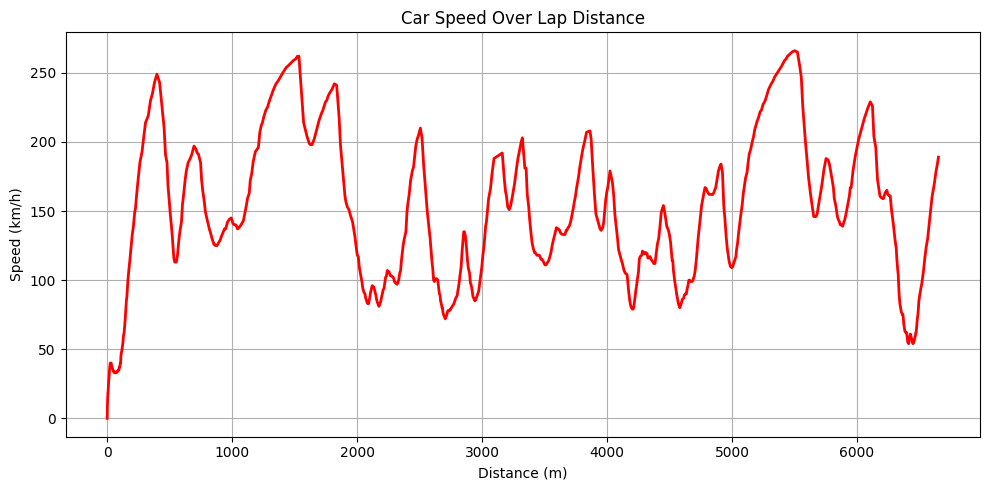

In [59]:
import matplotlib.pyplot as plt

# Plot speed vs. distance
plt.figure(figsize=(10, 5))
plt.plot(telemetry['Distance'], telemetry['Speed'], color='red', linewidth=2)
plt.xlabel('Distance (m)')
plt.ylabel('Speed (km/h)')
plt.title('Car Speed Over Lap Distance')
plt.grid(True)
plt.tight_layout()
plt.show()